In [2]:
import cv2
import numpy as np 
import math
import glob
from matplotlib import pyplot as plt
money_template = []
money_value = []

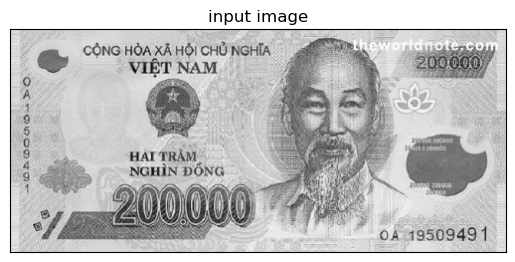

True

In [14]:
img = cv2.imread("2tram.jpg", 0)
img1 = cv2.imread("template\\100000.png", 0)
(w,h)=img1.shape
img = cv2.resize(img,(h,w))
plt.subplot(1,1,1),plt.imshow(img,'gray')
plt.title("input image")
plt.xticks([]),plt.yticks([])
plt.show()
cv2.imwrite("template\\out.png",img )